<a href="https://colab.research.google.com/github/elevano1/UTEC_Phyton/blob/main/modulo-III/sesion_iii_ejerc_cio_en_aula_student_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

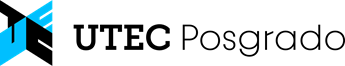

# Ejercício en aula
# Módulo 3 - Sesión 3: Simulación II
## Profesor: Germain Garcia Zanabria

### Indicaciones

Completa las secciones de código en las que se indique `### Completar`. Siga las instrucciones y proporcione la implementación adecuada en cada caso. Si necesitas ayuda o tienes alguna pregunta, no dudes en levantar la mano para que pueda asistirte.


In [ ]:
!pip install simpy

## Ejercício: Simulación de una Sucursal Bancaria

Modelaremos una sucursal bancaria con varios cajeros y clientes que llegan en intervalos de tiempo aleatorios.
Cada cliente requiere un cierto tiempo de atención en el cajero y puede haber clientes que deban esperar si todos los cajeros están ocupados.

In [ ]:
import simpy
import numpy as np
import random

# Definición de parámetros
TIEMPO_SIMULACION = 480   # Tiempo de simulación en minutos (8 horas)
NUM_CAJEROS = 2           # Número de cajeros disponibles en la sucursal
TIEMPO_ATENCION_MIN = 5   # Tiempo mínimo de atención en minutos
TIEMPO_ATENCION_MAX = 15  # Tiempo máximo de atención en minutos
INTERVALO_LLEGADA_CLIENTES = 10  # Intervalo promedio de llegada de clientes en minutos

# Función para simular la llegada de clientes
def llegada_clientes(env, cajeros):
    num_cliente = 0
    while True:
        yield env.timeout(### Completar  Generar aleatorio )
        num_cliente += 1
        env.process(atender_cliente(env, num_cliente, cajeros))

# Función para simular la atención de un cliente en un cajero
def atender_cliente(env, num_cliente, cajeros):
    llegada = env.now
    print(f"Llega el cliente {num_cliente} a la sucursal en el minuto {llegada}")

    with cajeros.request() as req:
        yield req
        espera = ### Completar calcular tiempo de espera
        print(f"El cliente {num_cliente} comienza a ser atendido en el minuto {env.now} (esperó {espera} minutos)")

        tiempo_atencion = ### Completar  # generar aleatorio con distribución uniforme discreta
        yield env.timeout(tiempo_atencion)
        print(f"El cliente {num_cliente} termina de ser atendido en el minuto {env.now}")

# Configuración inicial de SimPy
env = simpy.Environment()
cajeros = simpy.Resource(env, ### Completar con cantidad de cajeros disponible)

# Iniciar la simulación
env.process(llegada_clientes(env, cajeros))
env.run(until= ### Completar )   ### tiempo de simulacion
